In [89]:
import io
from copy import copy
from collections import OrderedDict
#from hamcrest import none
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import h5py
import mne
#import hypyp
import requests
import os
import PyQt5
import sys
import copy
import pickle
import os
#import statsmodels.api as sm
import autoreject
#from statsmodels.formula.api import ols
#print(sys.path)
sys.path.append('C:/Users/Administrateur/MilitaryCoordination/')
from my_utils import compute_freq_bands, compute_sync

"""
from hypyp import (
    prep,)  # need pip install https://api.github.com/repos/autoreject/autoreject/zipball/master
from hypyp import analyses
from hypyp import prep
from hypyp import stats
from hypyp import viz
"""
connectivity_path = r"C:\Users\nicoucke\OneDrive - UGent\Desktop\Hyperscanning 1\connectivity data"

In [109]:
# loop through all data files
individual_stack = np.empty((64,5))
sync_egal_stack = np.empty((64,5))
leader_stack = np.empty((64,5))
follower_stack = np.empty((64,5))
complementary_sync_egal_stack = np.empty((64,5))
complementary_leader_stack = np.empty((64,5))
complementary_follower_stack = np.empty((64,5))

pair = 1
for root, dirs, files in os.walk(connectivity_path):
    for name in files:
        if 'many_to_one_' in name:
            print("processing file " + name)

            file_path = os.path.join(connectivity_path, name)
            # define paths
            print(file_path)
            
            split_name = name.split("pair_")
            pair = int(split_name[1])

           # with open(file_path,"rb") as input_file:
           #     participant_1_power_values, participant_2_power_values = pickle.load(input_file)

            with open(file_path,"rb") as input_file:
                imcoh_values, ppc_values = pickle.load(input_file)



            for participant_power_values in ppc_values:
                #print(participant_power_values )
                #print(np.shape(participant_1_power_values['Synchronous/Egalitarian']))

                # define frequency bands 
                freq_bands = {'Theta': [4, 7],
                                'Alpha': [8, 12],
                                'Beta': [13, 30],
                                'Gamma': [30, 45],
                                'Beta_narrow': [18, 22]}
                freq_bands = OrderedDict(freq_bands)
                # select condition and frequency band
                event_id = {'Synchronous/Egalitarian': 2, 'Synchronous/LeaderFollower': 3, 'Synchronous/FollowerLeader': 4, 'Individual': 5, 'Complementary/Egalitarian': 6, 'Complementary/LeaderFollower': 7, 'Complementary/FollowerLeader': 8}
                print(pair)
       
                print(np.shape(participant_power_values['Synchronous/Leader']))
                if len(participant_power_values.keys()) != 7:
                    continue

          
                print(np.shape(participant_power_values['Individual']))
                individual_stack = np.dstack((individual_stack, participant_power_values['Individual']))
                print('gelukt')
                sync_egal_stack = np.dstack((sync_egal_stack , participant_power_values['Synchronous/Egalitarian']))
                leader_stack = np.dstack((leader_stack , participant_power_values['Synchronous/Leader']))
                follower_stack = np.dstack((follower_stack , participant_power_values['Synchronous/Follower']))
                complementary_sync_egal_stack = np.dstack((complementary_sync_egal_stack , participant_power_values['Complementary/Egalitarian']))
                complementary_leader_stack = np.dstack((complementary_leader_stack , participant_power_values['Complementary/Leader']))
                complementary_follower_stack = np.dstack((complementary_follower_stack , participant_power_values['Complementary/Follower']))
           

processing file many_to_one_pair_1
C:\Users\nicoucke\OneDrive - UGent\Desktop\Hyperscanning 1\connectivity data\many_to_one_pair_1
1
(64, 5)
(64, 5)
gelukt
1
(1, 5)
(1, 5)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 64 and the array at index 1 has size 1

In [92]:
# loop through all data files
individual_stack = np.empty((64,5))
sync_egal_stack = np.empty((64,5))
leader_stack = np.empty((64,5))
follower_stack = np.empty((64,5))
complementary_sync_egal_stack = np.empty((64,5))
complementary_leader_stack = np.empty((64,5))
complementary_follower_stack = np.empty((64,5))

pair = 1
for root, dirs, files in os.walk(connectivity_path):
    for name in files:
        if 'many_to_one_' in name:
            print("processing file " + name)

            file_path = os.path.join(connectivity_path, name)
            # define paths
            print(file_path)
            
            split_name = name.split("pair_")
            pair = int(split_name[1])

           # with open(file_path,"rb") as input_file:
           #     participant_1_power_values, participant_2_power_values = pickle.load(input_file)

            with open(file_path,"rb") as input_file:
                imcoh_values, ppc_values = pickle.load(input_file)

     

            for participant_power_values in imcoh_values:
                #print(participant_power_values )
                #print(np.shape(participant_1_power_values['Synchronous/Egalitarian']))

                # define frequency bands 
                freq_bands = {'Theta': [4, 7],
                                'Alpha': [8, 12],
                                'Beta': [13, 30],
                                'Gamma': [30, 45],
                                'Beta_narrow': [18, 22]}
                freq_bands = OrderedDict(freq_bands)
                # select condition and frequency band
                event_id = {'Synchronous/Egalitarian': 2, 'Synchronous/LeaderFollower': 3, 'Synchronous/FollowerLeader': 4, 'Individual': 5, 'Complementary/Egalitarian': 6, 'Complementary/LeaderFollower': 7, 'Complementary/FollowerLeader': 8}

                try:
                    print(np.shape(participant_power_values['Individual']))
                    individual_stack = np.dstack((individual_stack, participant_power_values['Individual']))
                    sync_egal_stack = np.dstack((sync_egal_stack , participant_power_values['Synchronous/Egalitarian']))
                    leader_stack = np.dstack((leader_stack , participant_power_values['Synchronous/Leader']))
                    follower_stack = np.dstack((follower_stack , participant_power_values['Synchronous/Follower']))
                    complementary_sync_egal_stack = np.dstack((complementary_sync_egal_stack , participant_power_values['Complementary/Egalitarian']))
                    complementary_leader_stack = np.dstack((complementary_leader_stack , participant_power_values['Complementary/Leader']))
                    complementary_follower_stack = np.dstack((complementary_follower_stack , participant_power_values['Complementary/Follower']))
                except: continue
            

            

processing file many_to_one_pair_1
C:\Users\nicoucke\OneDrive - UGent\Desktop\Hyperscanning 1\connectivity data\many_to_one_pair_1
(64, 5)
(64, 5)
processing file many_to_one_pair_10
C:\Users\nicoucke\OneDrive - UGent\Desktop\Hyperscanning 1\connectivity data\many_to_one_pair_10
(64, 5)
(64, 5)
processing file many_to_one_pair_11
C:\Users\nicoucke\OneDrive - UGent\Desktop\Hyperscanning 1\connectivity data\many_to_one_pair_11
(64, 5)
(64, 5)
processing file many_to_one_pair_12
C:\Users\nicoucke\OneDrive - UGent\Desktop\Hyperscanning 1\connectivity data\many_to_one_pair_12
(64, 5)
(64, 5)
processing file many_to_one_pair_13
C:\Users\nicoucke\OneDrive - UGent\Desktop\Hyperscanning 1\connectivity data\many_to_one_pair_13
(64, 5)
(64, 5)
processing file many_to_one_pair_14
C:\Users\nicoucke\OneDrive - UGent\Desktop\Hyperscanning 1\connectivity data\many_to_one_pair_14
(64, 5)
(64, 5)
processing file many_to_one_pair_15
C:\Users\nicoucke\OneDrive - UGent\Desktop\Hyperscanning 1\connectivity 

In [ ]:
from scipy.stats import ttest_rel

# get the montage that we will use
biosemi64_montage = mne.channels.make_standard_montage('biosemi64')

ch_names = biosemi64_montage.ch_names
sfreq = 512  # Example sampling frequency
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
info.set_montage(biosemi64_montage)


for contrast in range(4):
    if contrast == 0:
        participant_wise_contrast = sync_egal_stack - individual_stack
        t_stats, p_values = ttest_rel(sync_egal_stack, individual_stack, axis=2)
    elif contrast == 1:
        participant_wise_contrast = leader_stack - follower_stack
        t_stats, p_values = ttest_rel(leader_stack, follower_stack, axis=2)
    elif contrast == 2:
        participant_wise_contrast = complementary_sync_egal_stack - sync_egal_stack
        t_stats, p_values = ttest_rel(complementary_sync_egal_stack, sync_egal_stack, axis=2)
    elif contrast == 3:
        participant_wise_contrast = complementary_leader_stack - complementary_follower_stack
        t_stats, p_values = ttest_rel(complementary_leader_stack, complementary_follower_stack, axis=2)

    # Initialize a container for the cleaned contrast data
    cleaned_contrast = np.empty(participant_wise_contrast.shape)
    cleaned_contrast[:] = np.nan  # Fill with NaNs to later ignore these in mean calculation

    # Iterate over each channel and frequency band to exclude outliers
    for ch_idx in range(participant_wise_contrast.shape[0]):
        for freq_band in range(participant_wise_contrast.shape[1]):
            data = participant_wise_contrast[ch_idx, freq_band, :]
            mean = np.mean(data)
            std = np.std(data)
            # Identify outliers
            outliers_mask = np.abs(data - mean) > 3 * std
            # Exclude outliers by setting them to NaN
            data[outliers_mask] = np.nan
            # Store the cleaned data
            cleaned_contrast[ch_idx, freq_band, :] = data

    # Calculate the average across participants, ignoring NaN values
    average_contrast = np.nanmean(cleaned_contrast, axis=2)

    for freq_band in range(4):
        power_at_freq_band = average_contrast[:, freq_band]
        t_stat_freq = t_stats[:, freq_band]
        # Create the EvokedArray object
        # The data needs to be in the shape (n_channels, n_times), so we add an extra dimension to power_at_freq_band
        #evoked = mne.EvokedArray(power_at_freq_band[:, np.newaxis], info)
        evoked = mne.EvokedArray(t_stat_freq[:, np.newaxis], info)
        # Plot the scalp plot
        evoked.plot_topomap()
    plt.imshow(average_contrast)
    print(average_contrast)
    plt.legend()
    plt.show()

C:\Users\nicoucke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_stats_py.py:7755: ComplexWarning: Casting complex values to real discards the imaginary part
  d = (a - b).astype(np.float64)
C:\Users\nicoucke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\shape_base.py:402: ComplexWarning: Casting complex values to real discards the imaginary part
  buff[ind] = asanyarray(func1d(inarr_view[ind], *args, **kwargs))
C:\Users\nicoucke\AppData\Local\Temp\ipykernel_32\3679947500.py:40: ComplexWarning: Casting complex values to real discards the imaginary part
  cleaned_contrast[ch_idx, freq_band, :] = data
C:\Users\nicoucke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_stats_py.py:7755: ComplexWarning: Casting complex values to 

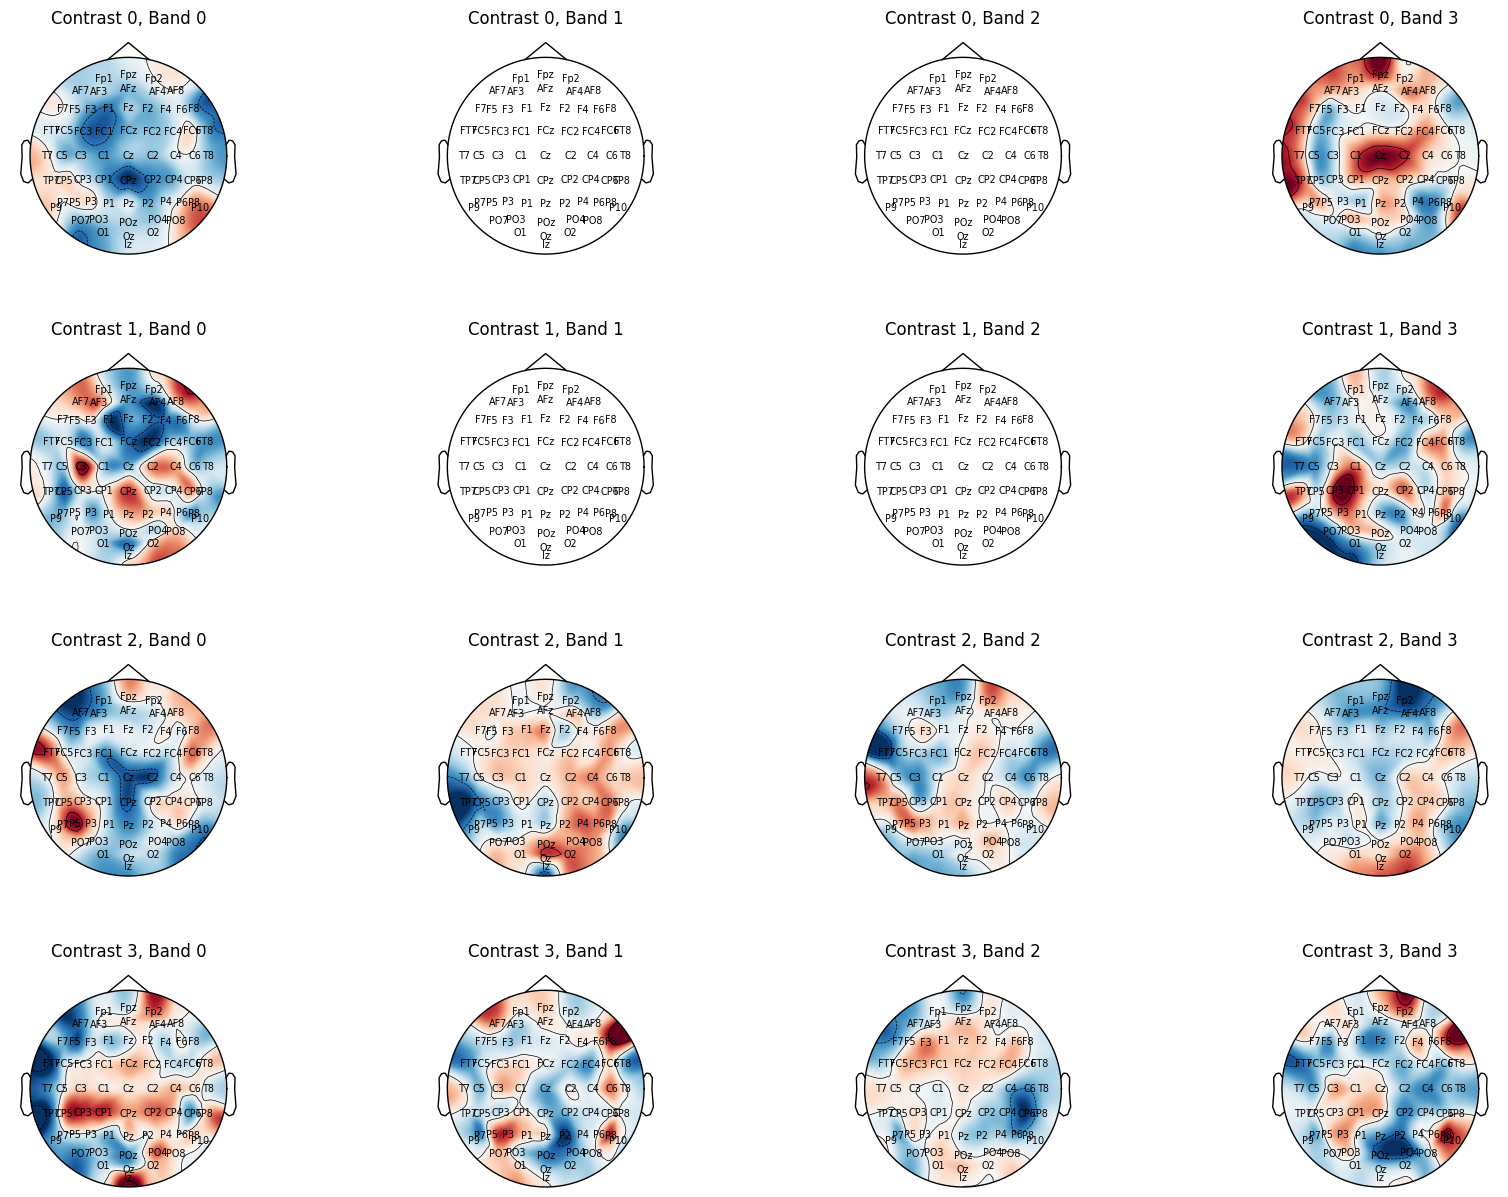

In [100]:
# Define the number of contrasts and frequency bands for your grid layout
num_contrasts = 4
num_freq_bands = 4  # Example: Theta, Alpha, Beta, Gamma

# Create a figure with a grid of subplots
fig, axs = plt.subplots(num_contrasts, num_freq_bands, figsize=(20, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust spacing between plots

# Iterate over each contrast and frequency band to create and plot Evoked objects
for contrast_idx in range(num_contrasts):
    if contrast_idx == 0:
        participant_wise_contrast = sync_egal_stack - individual_stack
        t_stats, p_values = ttest_rel(sync_egal_stack, individual_stack, axis=2)
    elif contrast_idx == 1:
        participant_wise_contrast = leader_stack - follower_stack
        t_stats, p_values = ttest_rel(leader_stack, follower_stack, axis=2)
    elif contrast_idx == 2:
        participant_wise_contrast = complementary_sync_egal_stack - sync_egal_stack
        t_stats, p_values = ttest_rel(complementary_sync_egal_stack, sync_egal_stack, axis=2)
    elif contrast_idx == 3:
        participant_wise_contrast = complementary_leader_stack - complementary_follower_stack
        t_stats, p_values = ttest_rel(complementary_leader_stack, complementary_follower_stack, axis=2)


    # Initialize a container for the cleaned contrast data
    cleaned_contrast = np.empty(participant_wise_contrast.shape)
    cleaned_contrast[:] = np.nan  # Fill with NaNs to later ignore these in mean calculation

    # Iterate over each channel and frequency band to exclude outliers
    for ch_idx in range(participant_wise_contrast.shape[0]):
        for freq_band in range(participant_wise_contrast.shape[1]):
            data = participant_wise_contrast[ch_idx, freq_band, :]
            mean = np.mean(data)
            std = np.std(data)
            # Identify outliers
            outliers_mask = np.abs(data - mean) > 3 * std
            # Exclude outliers by setting them to NaN
            data[outliers_mask] = np.nan
            # Store the cleaned data
            cleaned_contrast[ch_idx, freq_band, :] = data

    # Calculate the average across participants, ignoring NaN values
    average_contrast = np.nanmean(cleaned_contrast, axis=2)



    for freq_band_idx in range(num_freq_bands):
        
        # Select the correct axes for the current subplot
        ax = axs[contrast_idx, freq_band_idx]
           
    
        
        power_at_freq_band = average_contrast[:, freq_band_idx]
        t_stat_freq = t_stats[:, freq_band_idx]
        # Create the EvokedArray object
        # The data needs to be in the shape (n_channels, n_times), so we add an extra dimension to power_at_freq_band
        #evoked = mne.EvokedArray(power_at_freq_band[:, np.newaxis], info)
        evoked = mne.EvokedArray(t_stat_freq[:, np.newaxis], info)

        # Plot the topomap for the Evoked object on the specified axes
        # Note: For actual use, ensure 'times' parameter matches your Evoked data's time point(s)
        #mne.viz.plot_topomap(power_at_freq_band, evoked.info, axes=ax, show=False, contours=0,
        #                     sensors=False, res=64, names=evoked.ch_names)
        
        mne.viz.plot_topomap(t_stat_freq, evoked.info, axes=ax, show=False, contours=2,
                             sensors=False, res=64, names=evoked.ch_names)
        
        # Optionally, set titles, etc.
        ax.set_title(f'Contrast {contrast_idx}, Band {freq_band_idx}')

# Show the complete figure
plt.show()

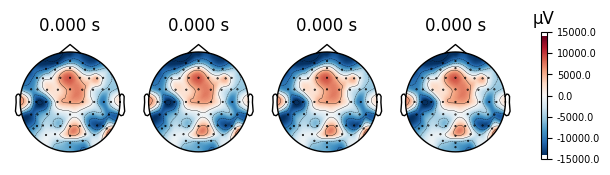

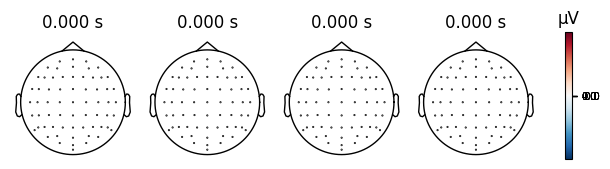

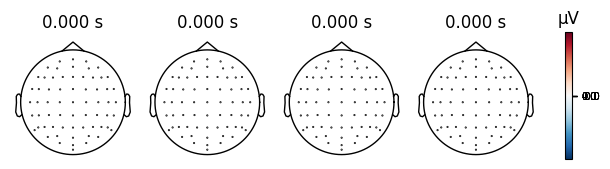

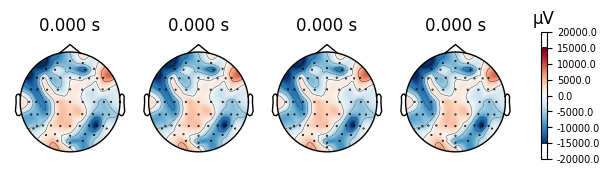

In [132]:
# get the montage that we will use
biosemi64_montage = mne.channels.make_standard_montage('biosemi64')

ch_names = biosemi64_montage.ch_names
sfreq = 2048  # Example sampling frequency
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
info.set_montage(biosemi64_montage)


for contrast in range(4):
    if contrast == 0:
            participant_wise_contrast = sync_egal_stack - individual_stack
    else:
        continue

    average_contrast = np.mean(participant_wise_contrast, axis = 2)
    for freq_band in range(4):
        power_at_freq_band = average_contrast[:, freq_band]
        
        # Create the EvokedArray object
        # The data needs to be in the shape (n_channels, n_times), so we add an extra dimension to power_at_freq_band
        evoked = mne.EvokedArray(power_at_freq_band[:, np.newaxis], info)

        # Plot the scalp plot
        evoked.plot_topomap()

In [155]:
import mne
import numpy as np

# Define your frequency bands
freq_bands = {
    'Theta': [4, 7],
    'Alpha': [8, 12],
    'Beta': [13, 30],
    'Gamma': [30, 45]
}

path = r"C:\Users\nicoucke\OneDrive - UGent\Desktop\Hyperscanning 1"
raw_path = r"C:\Users\nicoucke\OneDrive - UGent\Desktop\Hyperscanning 1\raw data"
prep_path = os.path.join(path, "preprocessed data")
log_path = os.path.join(path, "logs")

from my_utils import compute_freq_bands
name = 'pair_1'
file_path = os.path.join(prep_path, name)
# define paths
print(file_path)

split_name = name.split("_")
pair = int(split_name[1])


with open(file_path,"rb") as input_file:
    cleaned_epochs_AR = pickle.load(input_file)



preproc_S1 = cleaned_epochs_AR[0]
preproc_S2 = cleaned_epochs_AR[1]

freq_bands = {'Theta': [4, 7],
                'Alpha': [8, 12],
                'Beta': [13, 30],
                'Gamma': [30, 45]}
freq_bands = OrderedDict(freq_bands)
# select condition and frequency band
event_id = {'Synchronous/Egalitarian': 2, 'Synchronous/LeaderFollower': 3, 'Synchronous/FollowerLeader': 4, 'Individual': 5, 'Complementary/Egalitarian': 6, 'Complementary/LeaderFollower': 7, 'Complementary/FollowerLeader': 8}
pair_complex_signal_dict = {}

print('calculate complex signal for all conditions')
for condition in event_id.keys():

    # find the epoch positions of this condition
    epoch_positions = np.where(preproc_S1.events[:,2] == event_id[condition])
    print(epoch_positions)

    if event_id[condition] in preproc_S1.events[:,2]:
        print(np.shape(preproc_S1[condition]))
        print(np.shape(preproc_S2[condition]))
        data_inter = np.array([preproc_S1[condition], preproc_S2[condition]])
        complex_signal = compute_freq_bands(data_inter, 2048, freq_bands)
        pair_complex_signal_dict[condition] = complex_signal
    else:
        # if there are no epochs for the condition, just continue
        continue

# now we have the complex signal for each pair

    

C:\Users\nicoucke\OneDrive - UGent\Desktop\Hyperscanning 1\preprocessed data\pair_1
calculate complex signal for all conditions
(array([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
       62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78,
       79, 80, 81, 82, 83, 84], dtype=int64),)
(57, 64, 4097)
(57, 64, 4097)
(array([ 85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
       150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184], dtype=int64

In [128]:
print(np.shape(preproc_S1.get_data()))

(481, 64, 4097)


C:\Users\nicoucke\AppData\Local\Temp\ipykernel_32\1967456211.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(np.shape(preproc_S1.get_data()))


(57, 64, 4, 4097)


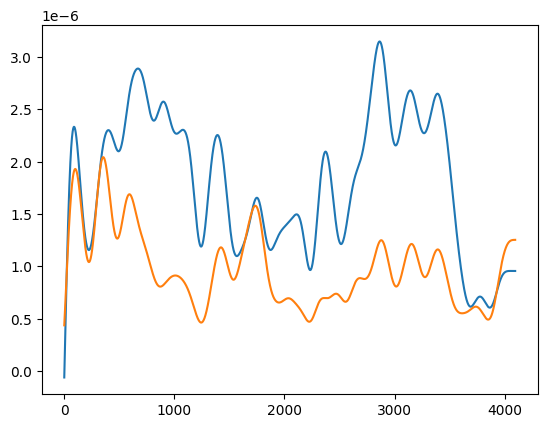

NameError: name 'STOP' is not defined

In [160]:
# calculate homogolous regions 
                
biosemi64_montage = mne.channels.make_standard_montage('biosemi64')
# change the channel names in our epochs so that they are the same as the montage
channels = biosemi64_montage.ch_names
from scipy.signal import hilbert

motor_channels = ["C3", "C1", "Cz", "C2", "C4"]
motor_channel_numbers = motor_channels
for i in range(len(motor_channels)):
    ch_name = motor_channels[i]
    index = channels.index(ch_name)
    motor_channel_numbers[i] = index



pair_imcoh_values = dict()
pair_ppc_values = dict()
for condition in event_id.keys():
    try: 
        complex_signal =   pair_complex_signal_dict[condition]
    except:
        # if there is no data for the condition then just go to the next
        continue

    # split up into frequencies and calculate for each frequency seperately
    result_list = []
    n_epochs, n_ch, n_times = complex_signal.shape[1], complex_signal.shape[2], complex_signal.shape[4]
    # (2, n_epochs, n_channels, n_freq_bands, n_times)
    
    signal_1 = complex_signal[0, :, :, :, :]
    signal_2 = complex_signal[1, :, :, :, :]


    # now compute the cross_spectrum and auto spectrum of signals (homologous channels)
    # this should remove the time dimension
    cross_spectrum = np.mean(signal_1 * np.conj(signal_2), axis=-1)

    auto_spectrum1 = np.mean(signal_1 * np.conj(signal_1), axis=-1)
    auto_spectrum2 = np.mean(signal_2 * np.conj(signal_2), axis=-1)

    # now calculculate the imaginary coherence
    imag_coherence = np.abs(np.imag(cross_spectrum)) / np.sqrt(auto_spectrum1 * auto_spectrum2)

    # now average across epochs 
    imag_coherence_averaged = np.mean(imag_coherence, axis = 0)
    


    # so the remaining should be channels x freq bands

    # now calculate the projected power correlations
    X = complex_signal[0,:,:,:,:]
    Y = complex_signal[1,:,:,:,:]

    n_epochs = X.shape[0]
    n_channels = X.shape[1]
    n_frequency_bands = X.shape[2]
    n_times = X.shape[3]

    print(np.shape(X))

    # Initialize an array to hold the PPC values for each epoch, channel, and frequency band
    ppc = np.zeros((n_epochs, n_channels, n_frequency_bands))


    from scipy.signal import filtfilt, butter

    # Create a low-pass filter
    nyquist = 0.5 * 2048  # Nyquist frequency
    cutoff_frequency = 10  # Desired cutoff frequency in Hz
    b, a = butter(4, cutoff_frequency / nyquist)

    

    for epoch in range(n_epochs):
        for channel in range(n_channels):
            for frequency_band in range(n_frequency_bands):
                # Extract the spectral coefficients for the current epoch, channel, and frequency band
                X_coeff = X[epoch, channel, frequency_band, :]
                Y_coeff = Y[epoch, channel, frequency_band, :]
                
                X_coeff = X[55, 32, 3, :]
                # Compute the orthogonal projections
                Y_proj_on_X = np.imag((Y_coeff) * np.conj(X_coeff) / np.abs(X_coeff))
                X_proj_on_Y = np.imag((X_coeff) * np.conj(Y_coeff) / np.abs(Y_coeff))

                
                Y_orthogonal = np.abs(Y_proj_on_X)
                X_orthogonal = np.abs(X_proj_on_Y)

                
                # Apply the filter to the amplitude envelope
                Y_orthogonal = filtfilt(b, a, Y_orthogonal)
                X_orthogonal = filtfilt(b, a, X_orthogonal)

                plt.plot(X_orthogonal)
                plt.plot(Y_orthogonal)
                plt.show()
                STOP
                # Compute correlation between the magnitudes of the orthogonal projections
                if np.std(Y_orthogonal) * np.std(X_orthogonal) != 0:  # Avoid division by zero
                    ppc_value = np.corrcoef(Y_orthogonal, X_orthogonal)[0, 1]
                else:
                    ppc_value = 0  # Assign a default value in case of std deviation being zero
                
                # Store the PPC value for the current epoch, channel, and frequency band
                ppc[epoch, channel, frequency_band] = ppc_value

    # now average over the epochs
    ppc_values_averaged = np.mean(ppc, axis = 0)
   
    pair_imcoh_values[condition] = imag_coherence_averaged
    pair_ppc_values[condition] = ppc_values_averaged 

  

In [110]:
# calculate homogolous regions 

print('calculate connectivity for each condition')
n_ch = len(preproc_S1.info['ch_names'])

pair_imcoh_values = dict()
pair_ppc_values = dict()
for condition in event_id.keys():
    try: 
        complex_signal =   pair_complex_signal_dict[condition]
    except:
        # if there is no data for the condition then just go to the next
        continue

    # split up into frequencies and calculate for each frequency seperately
    result_list = []
    n_epochs, n_ch, n_times = complex_signal.shape[1], complex_signal.shape[2], complex_signal.shape[4]
    # (2, n_epochs, n_channels, n_freq_bands, n_times)
    

    # now compute the cross_spectrum and auto spectrum of signals (homologous channels)
    # this should remove the time dimension
    cross_spectrum = np.mean(complex_signal[0,:,:,:,:] * np.conj(complex_signal[1,:,:,:,:]), axis=-1)

    auto_spectrum1 = np.mean(complex_signal[0,:,:,:,:] * np.conj(complex_signal[0,:,:,:,:]), axis=-1)
    auto_spectrum2 = np.mean(complex_signal[1,:,:,:,:] * np.conj(complex_signal[1,:,:,:,:]), axis=-1)

    # now calculculate the imaginary coherence
    imag_coherence = np.abs(np.imag(cross_spectrum)) / np.sqrt(auto_spectrum1 * auto_spectrum2)

    # now average across epochs 
    imag_coherence_averaged = np.mean(imag_coherence, axis = 0)
    # so the remaining should be channels x freq bands

    # now calculate the projected power correlations
    X = complex_signal[0,:,:,:,:]
    Y = complex_signal[1,:,:,:,:]

    n_epochs = X.shape[0]
    n_channels = X.shape[1]
    n_frequency_bands = X.shape[2]
    n_times = X.shape[3]

    # Initialize an array to hold the PPC values for each epoch, channel, and frequency band
    ppc = np.zeros((n_epochs, n_channels, n_frequency_bands))

    for epoch in range(n_epochs):
        for channel in range(n_channels):
            for frequency_band in range(n_frequency_bands):
                # Extract the spectral coefficients for the current epoch, channel, and frequency band
                X_coeff = X[epoch, channel, frequency_band, :]
                Y_coeff = Y[epoch, channel, frequency_band, :]
                
                # Compute the orthogonal projections
                Y_proj_on_X = (np.imag(Y_coeff) * np.conj(X_coeff)) / np.abs(X_coeff)
                X_proj_on_Y = (np.imag(X_coeff) * np.conj(Y_coeff)) / np.abs(Y_coeff)
                
                Y_orthogonal = np.abs(Y_proj_on_X)
                X_orthogonal = np.abs(X_proj_on_Y)
                
                # Compute correlation between the magnitudes of the orthogonal projections
                if np.std(Y_orthogonal) * np.std(X_orthogonal) != 0:  # Avoid division by zero
                    ppc_value = np.corrcoef(Y_orthogonal, X_orthogonal)[0, 1]
                else:
                    ppc_value = 0  # Assign a default value in case of std deviation being zero
                
                # Store the PPC value for the current epoch, channel, and frequency band
                ppc[epoch, channel, frequency_band] = ppc_value

    # now average over the epochs
    ppc_values_averaged = np.mean(ppc, axis = 0)
   
    pair_imcoh_values[condition] = imag_coherence_averaged
    pair_ppc_values[condition] = ppc_values_averaged 

    storepath = os.path.join(path, "connectivity data", 'homologous_pair_'+ str(pair))
    with open(storepath, "wb") as output_file: 
        pickle.dump([pair_imcoh_values, ppc_values_averaged], output_file, protocol=pickle.HIGHEST_PROTOCOL)

calculate connectivity for each condition


NameError: name 'preproc_S1' is not defined

In [4]:
epochs_1 = epoch_envelopes[0]
epochs_2 = epoch_envelopes[1]


freq_bands = {'Theta': [4, 7],
                'Alpha': [8, 12],
                'Beta': [13, 30],
                'Gamma': [30, 45]}
freq_bands = OrderedDict(freq_bands)
# select condition and frequency band
event_id = {'Synchronous/Egalitarian': 2, 'Synchronous/LeaderFollower': 3, 'Synchronous/FollowerLeader': 4, 'Individual': 5, 'Complementary/Egalitarian': 6, 'Complementary/LeaderFollower': 7, 'Complementary/FollowerLeader': 8}
pair_complex_signal_dict = {}

print('calculate complex signal for all conditions')
for condition in event_id.keys():

    # find the epoch positions of this condition
    epoch_positions = np.where(epochs_1{ievents[:,2] == event_id[condition])
    print(epoch_positions)

    if event_id[condition] in epochs_1.events[:,2]:
        data_inter = np.array([epochs_1[condition], epochs_2[condition]])
        complex_signal = compute_freq_bands(data_inter, 512, freq_bands)
        pair_complex_signal_dict[condition] = data_inter
        print('created data')
    else:
        # if there are no epochs for the condition, just continue
        continue

            
print('calculate connectivity for each condition')
n_ch = len(epochs_1.info['ch_names'])
connectivity_values = dict()
for condition in event_id.keys():
    try: 
        complex_signal =   pair_complex_signal_dict[condition]
    except:
        # if there is no data for the condition then just go to the next
        continue

    # split up into frequencies and calculate for each frequency seperately
    result_list = []
    n_epochs, n_ch, n_times = complex_signal.shape[1], complex_signal.shape[2], complex_signal.shape[4]
    for freq in range(4):
        
        # select a freq band but keep the dimension 
        freq_complex_signal = complex_signal[:,:,:,freq,:].reshape((2, n_epochs, n_ch, 1, n_times))

        freq_results = compute_sync(freq_complex_signal, mode='wpli', epochs_average = False, save_memory=True)
        result_list.append(freq_results)    

    # concatenate results of all frequencies
    results = np.concatenate(result_list, axis = 0)

    connectivity_values[condition] = results

storepath = os.path.join("F:/hyperscanning_mne", "connectivity_values_pair_" + str(pair))
with open(storepath, "wb") as output_file: 
    pickle.dump(connectivity_values, output_file, protocol=pickle.HIGHEST_PROTOCOL)

calculate complex signal for all conditions


AttributeError: 'dict' object has no attribute 'events'

In [7]:
biosemi64_montage = mne.channels.make_standard_montage('biosemi64')
# change the channel names in our epochs so that they are the same as the montage
channels = biosemi64_montage.ch_names
freq_bands = {'Theta': [4, 7],
            'Alpha': [8, 12],
            'Beta': [13, 30],
            'Gamma': [30, 45]}

freq_list = ['Theta', 'Alpha', 'Beta', 'Gamma']

ROI_channel_names = dict()
ROI_channel_names["left_frontal"] = ["Fp1", "AF7", "AF3", "F7", "F5", "F3"]
ROI_channel_names["right_frontal"] = ["Fp2", "AF8", "AF4", "F8", "F6", "F4"]

ROI_channel_names["left_central"] = ["FC1", "FC3", "C3", "C1", "CP3","CP1"]
ROI_channel_names["right_central"] = ["FC2", "FC4", "C4", "C2", "CP2","CP4"]

ROI_channel_names["left_temporal"] = ["T7", "TP7", "CP5", "P9", "P7", "P5"]
ROI_channel_names["right_temporal"] = ["T8", "TP8", "CP6", "P10", "P8", "P6"]

ROI_channel_numbers = copy.deepcopy(ROI_channel_names)

for key in ROI_channel_names.keys():
    for i in range(len(ROI_channel_names[key])):
        ch_name = ROI_channel_names[key][i]
        index = channels.index(ch_name)
        ROI_channel_numbers[key][i] = index

ROI_keys = list(ROI_channel_numbers.keys())
print(ROI_keys)

['left_frontal', 'right_frontal', 'left_central', 'right_central', 'left_temporal', 'right_temporal']


In [5]:

path = r"C:\Users\nicoucke\OneDrive - UGent\Desktop\Hyperscanning 1"
raw_path = r"C:\Users\nicoucke\OneDrive - UGent\Desktop\Hyperscanning 1\raw data"
prep_path = os.path.join(path, "preprocessed data")
log_path = os.path.join(path, "logs")

pair = 6

try:
    file_path = os.path.join(prep_path, 'pair_' + str(pair))
    #file_path = os.path.join("F:/hyperscanning_mne", "connectivity_values_pair_" + str(pair))
    print(file_path)


    with open(file_path,"rb") as input_file:
            cleaned_epochs_AR = pickle.load(input_file)
except:
    print('pair not available')


    
# Assuming 'epochs' is your Epochs object
event_id_counts = {event: np.sum(cleaned_epochs_AR[0].events[:, 2] == event_id) for event, event_id in cleaned_epochs_AR[0].event_id.items()}

# Display the count of epochs for each event type
for event, count in event_id_counts.items():
    print(f"Event '{event}': {count} epochs")

C:\Users\nicoucke\OneDrive - UGent\Desktop\Hyperscanning 1\preprocessed data\pair_6
Event 'Synchronous/Egalitarian': 0 epochs
Event 'Synchronous/LeaderFollower': 675 epochs
Event 'Synchronous/FollowerLeader': 424 epochs
Event 'Individual': 0 epochs
Event 'Complementary/Egalitarian': 0 epochs
Event 'Complementary/LeaderFollower': 0 epochs
Event 'Complementary/FollowerLeader': 0 epochs


In [4]:
# make a new dataframe that contains all the connectivity values for the ROIs
import pandas as pd
connectivity_df = pd.DataFrame(columns = ["pair", "group", "condition", "frequency", "ROI_1", "ROI_2", "ROI_combination", "wPLI"])
event_id = {'Synchronous/Egalitarian': 2, 'Synchronous/LeaderFollower': 3, 'Synchronous/FollowerLeader': 4, 'Individual': 5, 'Complementary/Egalitarian': 6, 'Complementary/LeaderFollower': 7, 'Complementary/FollowerLeader': 8}
n_ch = 64
i_df = 0
for pair in range(1,44):

    if (pair) > 20:
        group = 'civilian'
    else:
        group = 'military'

    ######### load in files ##############
    
    try:
        file_path = os.path.join("F:/hyperscanning_mne/", "permuted_connectivity_values_pair_" + str(pair))
        #file_path = os.path.join("F:/hyperscanning_mne", "connectivity_values_pair_" + str(pair))
        print(file_path)
        with open(file_path , "rb") as input_file:
            connectivity_values = pickle.load(input_file) 

        file_path = os.path.join("F:/hyperscanning_mne/", "pair_" + str(pair))     
        with open(file_path , "rb") as input_file:
            cleaned_epochs_AR, dic_AR = pickle.load(input_file)

        file_path = os.path.join("F:/hyperscanning_mne/", "bad_labels_pair_" + str(pair))
        with open(file_path , "rb") as input_file:
            bad_labels = pickle.load(input_file) 
                
    except:
        print('pair not available')
        continue
    


    preproc_S1 = cleaned_epochs_AR[0]
    preproc_S2 = cleaned_epochs_AR[1]


    ###### get positions of conditions for extra rejection steps##############
    event_id = {'Synchronous/Egalitarian': 2, 'Synchronous/LeaderFollower': 3, 'Synchronous/FollowerLeader': 4, 'Individual': 5, 'Complementary/Egalitarian': 6, 'Complementary/LeaderFollower': 7, 'Complementary/FollowerLeader': 8}
    epoch_position_dict = {}

    print('calculate complex signal for all conditions')
    for condition in event_id.keys():

        # find the epoch positions of this condition
        epoch_positions = np.where(preproc_S1.events[:,2] == event_id[condition])

        if event_id[condition] in preproc_S1.events[:,2]:
            epoch_position_dict[condition] = epoch_positions



    ########### apply the extra rejection step to the data ###################
    for condition in connectivity_values.keys():

        try: 
            results = connectivity_values[condition]
        except:
            continue
            
        print(pair)
        print(condition)
        print(epoch_position_dict)
        print(np.shape(bad_labels[0]))

        # get part of the rejection_log that corresponds to condition
        condition_log_1 = bad_labels[0][epoch_position_dict[condition]]
        condition_log_2 = bad_labels[1][epoch_position_dict[condition]]
        
        
        # set the correct positions of the connectivity matrix to nans
        for ch_1 in range(64):
            # intra-brain
            bad_epochs = np.where((condition_log_1[:,ch_1] == 1))
            results[:,bad_epochs, ch_1, ch_1] = np.nan

            for ch_2 in range(64):
                # intra-brain for channel 2
                bad_epochs = np.where((condition_log_2[:,ch_2] == 1))
                results[:,bad_epochs, n_ch+ch_2, n_ch+ch_2] = np.nan

                # find bad segments for inter-brain
                bad_epochs = np.clip(condition_log_1[:,ch_1] + condition_log_2[:,ch_2], 0, 1)
                bad_epochs = bad_epochs.astype(int)
                results[:,bad_epochs, ch_1, n_ch+ch_2] = np.nan
                results[:,bad_epochs, n_ch+ch_2, ch_1] = np.nan

        connectivity_values[condition] = results



    ############### average the connectivity values into ROIs #################################
    for condition in connectivity_values.keys():
        condition_data = connectivity_values[condition]
        print(condition_data.shape)
        # first get the inter_brain part
        n_ch = 64
        condition_data = condition_data[:, :, 0:n_ch, n_ch:2*n_ch]

        # loop over all frequencies and inter-brain pairs
        for frequency in range(4):
            freq_string = freq_list[frequency]

            # loop over all ROI's
            for ROI_1 in range(6):
                ROI_1_string = ROI_keys[ROI_1]
                channel_numbers_1 = ROI_channel_numbers[ROI_1_string]
                for ROI_2 in range(6):
                    ROI_2_string = ROI_keys[ROI_2]
                    ROI_combination = ROI_1_string + "-" + ROI_2_string

                    channel_numbers_2 = ROI_channel_numbers[ROI_2_string]
                    

                    # first average within the epochs and then between the epochs
                    epoch_list = []
                    for epoch in range(np.shape(condition_data)[1]):
                        epoch_value = 0
                        counter = 0
                        for ch_1 in channel_numbers_1:
                            for ch_2 in channel_numbers_2:
                                if not np.isnan(condition_data[frequency, epoch, ch_1, ch_2]):
                                    epoch_value+=condition_data[frequency, epoch, ch_1, ch_2]
                                    counter+=1
                        if counter < 9: # if there are less than 9 connections (3x3) in the ROI combination, the epoch should not be taken into account
                            continue

                        try:
                            epoch_list.append(epoch_value/counter)
                        except:
                            # if all segments are bad then skip the epoch
                            continue

                    ROI_connectivity = np.nanmean(epoch_list)




                    datapoint = pd.Series(data=[pair, group, condition, freq_string, ROI_1_string, ROI_2_string, ROI_combination, ROI_connectivity],  index= connectivity_df.columns, name = i_df)
                                
                    connectivity_df = pd.concat([connectivity_df, datapoint.to_frame().T], ignore_index = True) #grid_results.append(configuration_result)
                    i_df+=1
print(connectivity_df)







F:/hyperscanning_mne/permuted_connectivity_values_pair_1
pair not available
F:/hyperscanning_mne/permuted_connectivity_values_pair_2
calculate complex signal for all conditions
2
Synchronous/Egalitarian
{'Synchronous/Egalitarian': (array([ 915,  916,  917,  918,  919,  920,  921,  922,  923,  924,  925,
        926,  927,  928,  929,  930,  931,  932,  933,  934,  935,  936,
        937,  938,  939,  940,  941,  942,  943,  944,  945,  946,  947,
        948,  949,  950,  951,  952,  953,  954,  955,  956,  957,  958,
        959,  960,  961,  962,  963,  964,  965,  966,  967,  968,  969,
        970,  971,  972,  973,  974,  975,  976,  977,  978,  979,  980,
        981,  982,  983,  984,  985,  986,  987,  988,  989,  990,  991,
        992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001, 1002,
       1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013,
       1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024,
       1025, 1026, 1027, 1028, 1029, 1

In [5]:
#df_filtered.to_csv("averaged_connectivity_values.csv")
connectivity_df.to_csv("permutation_prep3_full_averaged_connectivity_values.csv")


In [3]:
# with this code we will also normalize all values wrt the individual condition (using fisher z transform)

# make a new dataframe that contains all the connectivity values for the ROIs
import pandas as pd
connectivity_df = pd.DataFrame(columns = ["pair", "group", "condition", "frequency", "ROI_1", "ROI_2", "ROI_combination", "wPLI"])
event_id = {'Synchronous/Egalitarian': 2, 'Synchronous/LeaderFollower': 3, 'Synchronous/FollowerLeader': 4, 'Individual': 5, 'Complementary/Egalitarian': 6, 'Complementary/LeaderFollower': 7, 'Complementary/FollowerLeader': 8}
n_ch = 64
i_df = 0
for pair in range(1,44):

    if (pair) > 20:
        group = 'civilian'
    else:
        group = 'military'

    ######### load in files ##############
    
    try:
        file_path = os.path.join("F:/hyperscanning_mne/", "connectivity_values_pair_" + str(pair))
        #file_path = os.path.join("F:/hyperscanning_mne", "connectivity_values_pair_" + str(pair))
        print(file_path)
        with open(file_path , "rb") as input_file:
            connectivity_values = pickle.load(input_file) 

        file_path = os.path.join("F:/hyperscanning_mne/", "pair_" + str(pair))     
        with open(file_path , "rb") as input_file:
            cleaned_epochs_AR, dic_AR = pickle.load(input_file)

        file_path = os.path.join("F:/hyperscanning_mne/", "bad_labels_pair_" + str(pair))
        with open(file_path , "rb") as input_file:
            bad_labels = pickle.load(input_file) 
                
    except:
        print('pair not available')
        continue
    


    preproc_S1 = cleaned_epochs_AR[0]
    preproc_S2 = cleaned_epochs_AR[1]


    ###### get positions of conditions for extra rejection steps##############
    event_id = {'Synchronous/Egalitarian': 2, 'Synchronous/LeaderFollower': 3, 'Synchronous/FollowerLeader': 4, 'Individual': 5, 'Complementary/Egalitarian': 6, 'Complementary/LeaderFollower': 7, 'Complementary/FollowerLeader': 8}
    epoch_position_dict = {}

    print('calculate complex signal for all conditions')
    for condition in event_id.keys():

        # find the epoch positions of this condition
        epoch_positions = np.where(preproc_S1.events[:,2] == event_id[condition])

        if event_id[condition] in preproc_S1.events[:,2]:
            epoch_position_dict[condition] = epoch_positions



    ########### apply the extra rejection step to the data ###################
    for condition in connectivity_values.keys():

        try: 
            results = connectivity_values[condition]
        except:
            continue
            
        print(pair)
        print(condition)
        print(epoch_position_dict)
        print(np.shape(bad_labels[0]))

        # get part of the rejection_log that corresponds to condition
        condition_log_1 = bad_labels[0][epoch_position_dict[condition]]
        condition_log_2 = bad_labels[1][epoch_position_dict[condition]]
        
        
        # set the correct positions of the connectivity matrix to nans
        for ch_1 in range(64):
            # intra-brain
            bad_epochs = np.where((condition_log_1[:,ch_1] == 1))
            results[:,bad_epochs, ch_1, ch_1] = np.nan

            for ch_2 in range(64):
                # intra-brain for channel 2
                bad_epochs = np.where((condition_log_2[:,ch_2] == 1))
                results[:,bad_epochs, n_ch+ch_2, n_ch+ch_2] = np.nan

                # find bad segments for inter-brain
                bad_epochs = np.clip(condition_log_1[:,ch_1] + condition_log_2[:,ch_2], 0, 1)
                bad_epochs = bad_epochs.astype(int)
                results[:,bad_epochs, ch_1, n_ch+ch_2] = np.nan
                results[:,bad_epochs, n_ch+ch_2, ch_1] = np.nan

        connectivity_values[condition] = results



    # calculate the distribution of the individual condition to serve as a baseline
    individual_fisher_means = np.zeros((4, 6, 6)) # freq, roi1, roi2
    individual_fisher_stds = np.zeros((4, 6, 6))
    print(connectivity_values.keys())

    for condition in connectivity_values.keys():
        print(condition)
        if condition != "Individual":
            continue
        
        condition_data = connectivity_values[condition]
        n_ch = 64
        condition_data = condition_data[:, :, 0:n_ch, n_ch:2*n_ch]

        # loop over all frequencies and inter-brain pairs
        for frequency in range(4):
            freq_string = freq_list[frequency]

            # loop over all ROI's
            for ROI_1 in range(6):
                ROI_1_string = ROI_keys[ROI_1]
                channel_numbers_1 = ROI_channel_numbers[ROI_1_string]
                for ROI_2 in range(6):
                    ROI_2_string = ROI_keys[ROI_2]
                    ROI_combination = ROI_1_string + "-" + ROI_2_string

                    channel_numbers_2 = ROI_channel_numbers[ROI_2_string]
                    
                    # first average within the epochs and then between the epochs
                    epoch_list = []
                    for epoch in range(np.shape(condition_data)[1]):
                        epoch_value = 0
                        counter = 0
                        for ch_1 in channel_numbers_1:
                            for ch_2 in channel_numbers_2:
                                if not np.isnan(condition_data[frequency, epoch, ch_1, ch_2]):
                                    value = condition_data[frequency, epoch, ch_1, ch_2]
                                    # convert value with fisher z
                                    converted_value = 0.5*(np.log(1+value) - np.log(1-value))

                                    epoch_value+=converted_value
                                    counter+=1
                        if counter < 9: # if there are less than 9 connections (3x3) in the ROI combination, the epoch should not be taken into account
                            continue


                        try:
                            epoch_list.append(epoch_value/counter)
                        except:
                            # if all segments are bad then skip the epoch
                            continue
                    individual_fisher_means[frequency, ROI_1, ROI_2] = np.mean(epoch_list)
                    individual_fisher_stds[frequency, ROI_1, ROI_2] = np.std(epoch_list)





    ############### average the connectivity values into ROIs #################################
    for condition in connectivity_values.keys():
        condition_data = connectivity_values[condition]
        print(condition_data.shape)
        # first get the inter_brain part
        n_ch = 64
        condition_data = condition_data[:, :, 0:n_ch, n_ch:2*n_ch]

        # loop over all frequencies and inter-brain pairs
        for frequency in range(4):
            freq_string = freq_list[frequency]

            # loop over all ROI's
            for ROI_1 in range(6):
                ROI_1_string = ROI_keys[ROI_1]
                channel_numbers_1 = ROI_channel_numbers[ROI_1_string]
                for ROI_2 in range(6):
                    ROI_2_string = ROI_keys[ROI_2]
                    ROI_combination = ROI_1_string + "-" + ROI_2_string

                    channel_numbers_2 = ROI_channel_numbers[ROI_2_string]
                    

                    # first average within the epochs and then between the epochs
                    epoch_list = []
                    for epoch in range(np.shape(condition_data)[1]):
                        epoch_value = 0
                        counter = 0
                        for ch_1 in channel_numbers_1:
                            for ch_2 in channel_numbers_2:
                                if not np.isnan(condition_data[frequency, epoch, ch_1, ch_2]):
                                   value = condition_data[frequency, epoch, ch_1, ch_2]

                                   # convert value with fisher z
                                   converted_value = 0.5*(np.log(1+value) - np.log(1-value))
                                   print(converted_value)
                                   epoch_value+=converted_value
                                   counter+=1
                        if counter < 9: # if there are less than 9 connections (3x3) in the ROI combination, the epoch should not be taken into account
                            continue

                        try:

                            # normalize this epoch value to the individual data

                            epoch_average = epoch_value/counter
                            epoch_average_normalized = (epoch_average - individual_fisher_means[frequency, ROI_1, ROI_2]) / individual_fisher_stds[frequency, ROI_1, ROI_2]



                            epoch_list.append(epoch_average_normalized)
                        except:
                            # if all segments are bad then skip the epoch
                            continue

                    ROI_connectivity = np.nanmean(epoch_list)




                    datapoint = pd.Series(data=[pair, group, condition, freq_string, ROI_1_string, ROI_2_string, ROI_combination, ROI_connectivity],  index= connectivity_df.columns, name = i_df)
                                
                    connectivity_df = pd.concat([connectivity_df, datapoint.to_frame().T], ignore_index = True) #grid_results.append(configuration_result)
                    i_df+=1
print(connectivity_df)




F:/hyperscanning_mne/connectivity_values_pair_1
calculate complex signal for all conditions
1
Synchronous/Egalitarian
{'Synchronous/Egalitarian': (array([202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214,
       215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,
       228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240,
       241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253,
       254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266,
       267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279,
       280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292,
       293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305,
       306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318,
       319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331,
       332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344,
       345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355,

In [12]:
connectivity_df.to_csv("normalized_prep3_full_averaged_connectivity_values.csv")



In [6]:
# checking the frequency spectra per condition after preprocessing

for pair in range(1,44):

    if (pair) > 20:
        group = 'civilian'
    else:
        group = 'military'

    ######### load in files ##############
    
    try:

        file_path = os.path.join("F:/hyperscanning_mne/", "pair_" + str(pair))     
        with open(file_path , "rb") as input_file:
            cleaned_epochs_AR, dic_AR = pickle.load(input_file)
                
    except:
        print('pair not available')
        continue

    path = r"F:/hyperscanning_mne"
    log_path = os.path.join(path, "logs")
    log_folder_path = os.path.join(log_path, str(pair))
    
   
    ###### get positions of conditions for extra rejection steps##############
    event_id = {'Synchronous/Egalitarian': 2, 'Synchronous/LeaderFollower': 3, 'Synchronous/FollowerLeader': 4, 'Individual': 5, 'Complementary/Egalitarian': 6, 'Complementary/LeaderFollower': 7, 'Complementary/FollowerLeader': 8}
    epoch_position_dict = {}

    print('calculate complex signal for all conditions')
    for condition in event_id.keys():
        print(condition)
        if event_id[condition] in cleaned_epochs_AR[0].events[:,2]:
            fig = mne.Epochs.plot_psd(cleaned_epochs_AR[0][condition])
            plt.savefig(os.path.join(log_folder_path, 'past_ar_freq_','condition'))
            fig = mne.Epochs.plot_psd(cleaned_epochs_AR[0][condition])
            plt.savefig(os.path.join(log_folder_path, 'past_ar_freq_','condition'))

    plt.close('all')



calculate complex signal for all conditions
Synchronous/Egalitarian
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


: 

: 

file_path = os.path.join("F:/hyperscanning_mne", "pair_" + str(40))


with open(file_path , "rb") as input_file:

    cleaned_epochs_AR, pair_info = pickle.load(input_file)
%matplotlib inline

print(pair_info['bad_epochs_AR'][0])
log = pair_info['bad_epochs_AR'][0]
fig = log.plot()

In [ ]:
model = ols("""wPLI ~C(condition) + C(ROI_combination) + C(condition):C(ROI_combination)""", data = df_filtered).fit

In [ ]:
# extra cell to load in preprocessed data and check if it is any good

for pair in range(1,45):

    print('pair ' + str(pair))
    file_path = os.path.join("F:/hyperscanning_mne/prep method 1", "pair_" + str(pair))     
    with open(file_path , "rb") as input_file:
        cleaned_epochs_AR, dic_AR = pickle.load(input_file)

    plt.plot(range(10), range(10))
    plt.show(block = True)

    #cleaned_epochs_AR[0].plot()
    #cleaned_epochs_AR[1].plot()
    #mne.Epochs.plot(cleaned_epochs_AR[0])


    #mne.Epochs.plot(cleaned_epochs_AR[1])


In [ ]:

plt.plot(range(10), range(10))
#plt.show(block = True)